# Study of [EPIC249624646](https://exofop.ipac.caltech.edu/k2/edit_target.php?id=249624646)

For the star's properties, I have used those calculated in [this paper](https://arxiv.org/pdf/1901.03716.pdf).

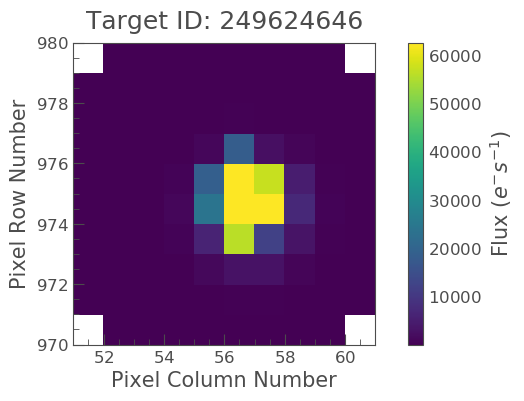

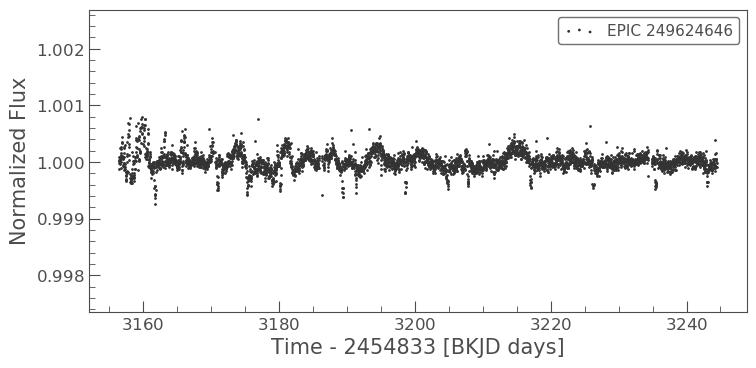

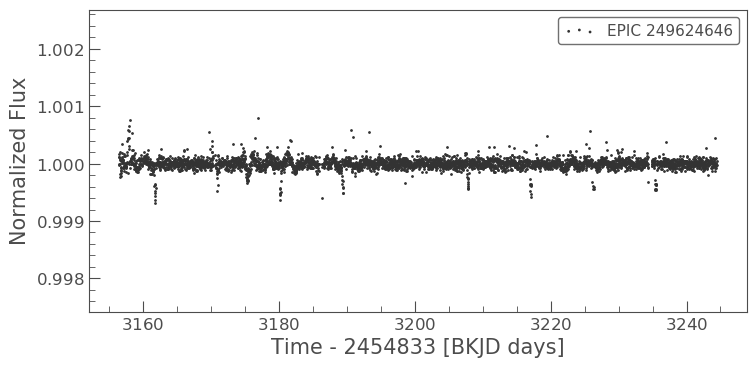

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import search_lightcurvefile
from lightkurve import search_targetpixelfile
target = '249624646'

tpf = search_targetpixelfile(target).download()
tpf.plot()
lc = search_lightcurvefile(target).download().PDCSAP_FLUX.remove_nans().remove_outliers()
lc.scatter()
corr_lc = lc.to_corrector("sff").correct(windows=40)
corr_lc_f, trend = corr_lc.flatten(window_length=401, return_trend=True)
corr_lc_f.scatter()

Best Fit Period: 18.4281 days


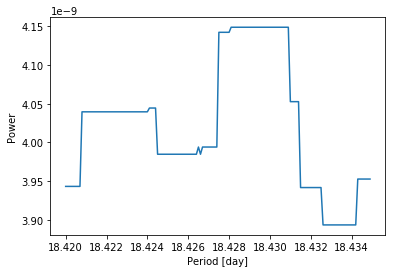

In [55]:
from astropy.stats import BoxLeastSquares
import matplotlib.pyplot as plt

bls = BoxLeastSquares(corr_lc_f.time, corr_lc_f.flux, corr_lc_f.flux_err)
periods = np.arange(18.42, 18.435, 0.0001)
durations = np.arange(0.005, 0.15, 0.001)
periodogram = bls.power(periods, durations)

plt.plot(periodogram.period, periodogram.power)
plt.ylabel("Power")
plt.xlabel("Period [day]");

period = periods[np.argmax(periodogram.power)]
print('Best Fit Period: {:0.4f} days'.format(period))

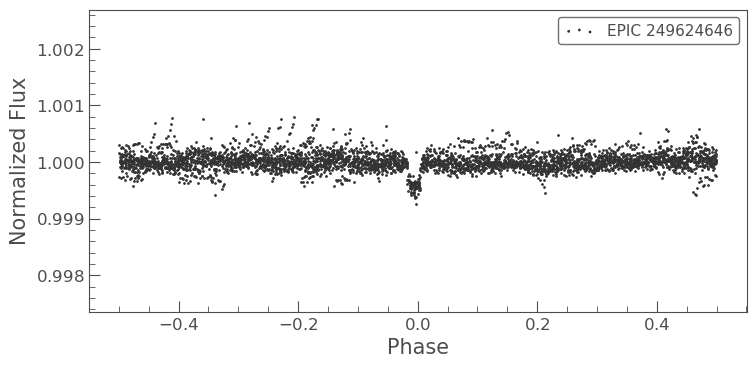

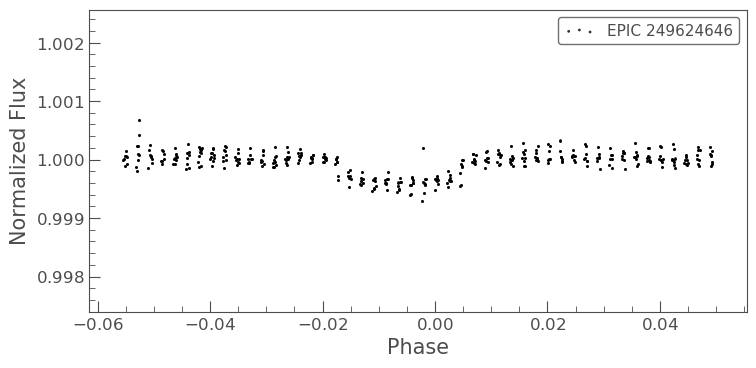

In [101]:
period_f = period / 2
lcf = lc.fold(period=period_f,t0=1.4)
lcf.scatter()
lc_transit = lcf[1800:2200].normalize()
lc_transit.scatter()
lcf.time_format = 'jd'
period_f
plt.scatter(lc_transit.time, lc_transit.flux, s=1, c='k')
plt.savefig('transit.png')

In [76]:
import math

R_star = 1.337 # in sun's radius
R_star = R_star * 695510000 # in meter

Td_values = lc_transit.time[lc_transit.flux < 0.9998]
Td = Td_values[-1] - Td_values[0]

min_tr = lc_transit.flux[lc_transit.flux < 0.9998].mean()
R_planet = math.sqrt(1-min_tr)*R_star
R_planet = R_planet / 69911000 # in jupiter's radius

Td , R_planet*11.2

(0.021900203648613115, 2.93362349917375)

In [77]:
G = 6.67408 * 10**(-11)
P = period_f*86400
M = 1.093*1.98847*10**30
a = (G*M*P**2/(2*math.pi)**2) ** (1./3)
i = math.acos(math.sqrt((R_star/a)**2 - (Td*math.pi/P)**2)) # in radians
b = a * math.cos(i)

a = a / 149597870700 # astronomical unit
b = b / R_star
i = math.degrees(i)

a, i, b

(0.0886015021251001, 85.9770204195702, 0.9999999999992407)

|      EPIC          |       249624646      |
|:------------------:|:--------------------:|
|   Planet's period  |      9.2144 days     |
|   Planet's radius  |0.296 Jupiter's radius|
| Transit's duration |      0.0221 days     |
|     Inclination    |    88.650°           |
|   Semi-major axis  |       0.2838 AU      |
|   Temperature      |       6137 K         |

In [78]:
u1 = 0.30495
u2 = 0.3095
µ = math.cos(math.asin(b))

I_µ = 1 - u1*(1-µ) - u2*((1-µ)**2)

I_µ, µ

(0.3855511385830263, 1.232299903958092e-06)

In [79]:
R_planet = R_planet * 69911000
R_planet = math.sqrt((1-min(lc_transit.flux))/I_µ)*R_star
R_planet = R_planet / 69911000

R_planet*11.2

6.387542482720696

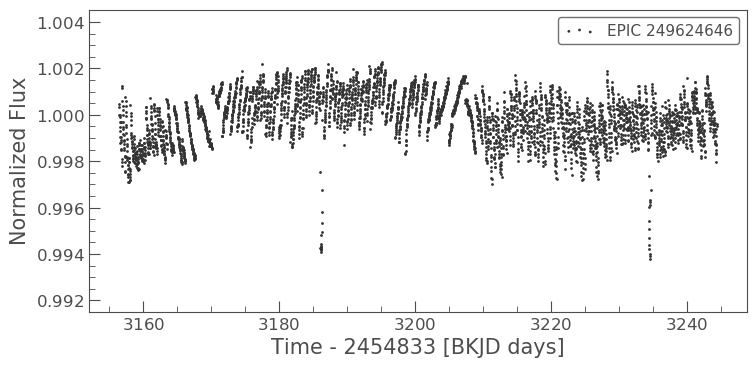

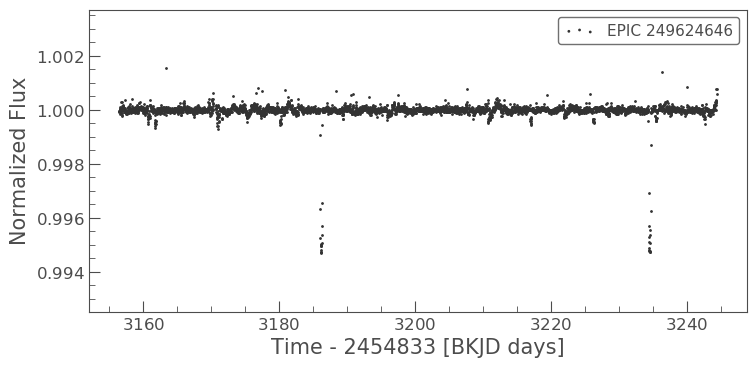

In [80]:
lcp = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
lcp.scatter()
corr_lcp = lcp.to_corrector("sff").correct(windows=40)
corr_lcp_f, trend = corr_lcp.flatten(window_length=401, return_trend=True)
corr_lcp_f.scatter()

Best Fit Period: 48.3349 days


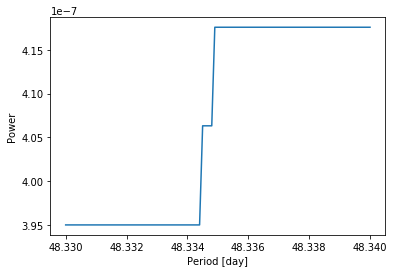

In [81]:
bls = BoxLeastSquares(corr_lcp_f.time, corr_lcp_f.flux, corr_lcp_f.flux_err)
periods = np.arange(48.33, 48.34, 0.0001)
durations = np.arange(0.005, 0.15, 0.0001)
periodogram = bls.power(periods, durations)

plt.plot(periodogram.period, periodogram.power)
plt.ylabel("Power")
plt.xlabel("Period [day]");

period_p = periods[np.argmax(periodogram.power)]
print('Best Fit Period: {:0.4f} days'.format(period_p))

48.33490000000016

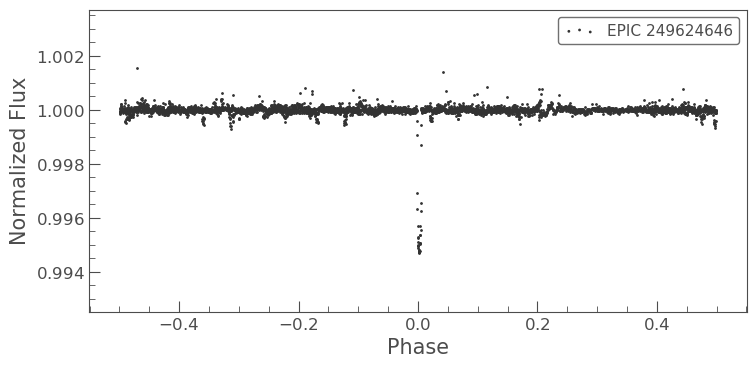

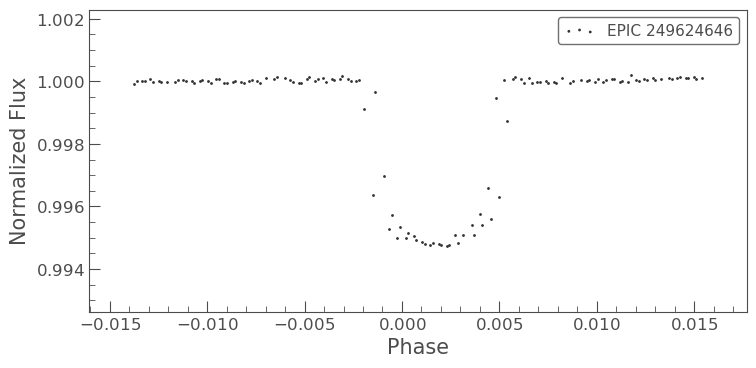

In [85]:
period_f = period_p
lcf = corr_lcp_f.fold(period=period_f,t0=-4)
lcf.scatter()
lcp_transit = lcf[2150:2280].normalize()
lcp_transit.scatter()
lcf.time_format = 'jd'
period_f

In [90]:
import math

R_star_c = 1.337 # in sun's radius
R_star_c = R_star_c * 695510000 # in meter

Td_values = lcp_transit.time[lcp_transit.flux < 0.9995]
Td = Td_values[-1] - Td_values[0]

R_planet_c = math.sqrt(1-min(lcp_transit.flux))*R_star
R_planet_c = R_planet_c / 69911000 # in jupiter's radius

R_planet_c*11.2

10.806669039134679

In [91]:
G = 6.67408 * 10**(-11)
P = period_f*86400
M = 1.093*1.98847*10**30
a = (G*M*P**2/(2*math.pi)**2) ** (1./3)
i = math.acos(math.sqrt((R_star/a)**2 - (Td*math.pi/P)**2)) # in radians
b = a * math.cos(i)

a = a / 149597870700 # astronomical unit
b = b / R_star
i = math.degrees(i)

a, i, b

(0.26749433649737103, 88.66845297463745, 0.9999999999999761)

In [95]:
u1 = 0.30495
u2 = 0.3095
µ = math.cos(math.asin(b))

I_µ = 1 - u1*(1-µ) - u2*((1-µ)**2)

I_µ, µ

(0.3855502018774362, 2.1849391302358923e-07)

In [97]:
R_planet_c = R_planet_c * 69911000
R_planet_c = math.sqrt((1-min(lcp_transit.flux))/I_µ)*R_star_c
R_planet_c = R_planet_c / 69911000

R_planet_c*11.2

17.40409253497455

### We have two planets!